## Data Cleaning & Feature Engineering on Black Friday Dataset

#### The Goal of this is to Clean the data and do Feature Engineering so that we are ready for Model Training. We do full EDA seperately

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [133]:
# Importing the dataset
df_train = pd.read_csv("BlackFriday/train.csv")

In [134]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [135]:
df_test = pd.read_csv("BlackFriday/test.csv")

## Combining the test and train datasets

In [136]:
# Combine Train and Test Data
# 
# df_train.append(df_test)

# Another Approach
df = pd.concat([df_train,df_test])

# Merge can also be used for combining

In [137]:
(df_test.shape,df_train.shape, df.shape)

((233599, 11), (550068, 12), (783667, 12))

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [139]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [140]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [141]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,783667,783667,783667,783667,783667
unique,3677,2,7,3,5
top,P00265242,M,26-35,B,1
freq,2709,590031,313015,329739,276425


## Data Cleaning and Preprocessing

In [142]:
df.drop(['User_ID'], axis=1,inplace=True)
df.head(1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0


### Labelling the Categorical Variables

  #### Gender

In [143]:
# Approach 1

#df["Gender"] = pd.get_dummies(df["Gender"],drop_first=1)


# Requires additional working in deleting 1 col and appending to the original df

In [144]:
# Approach 2

df["Gender"] = df["Gender"].map({"M":1,"F":0})

#### Age

Here we are converting this to dummies as age is a factor to be consider and ordinal rank will help the model understand the rank. This is called as Target Guding

In [145]:
# Approach 1

# df['Age'].unique()
# df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
# df.head(3)

In [146]:
# df['Age'].unique()

In [147]:
# Approach 2 

In [148]:
from sklearn import preprocessing

# label encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

df["Age"] = label_encoder.fit_transform(df["Age"])

df["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1])

#### City


In [149]:
df_city = pd.get_dummies(df["City_Category"], drop_first=1)


In [150]:
df_city.head(3)

,B,C
0,0,0
1,0,0
2,0,0


In [151]:
df = pd.concat([df,df_city],axis=1)
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0


In [152]:
df.drop(["City_Category"],axis=1,inplace=True)

In [153]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [154]:
df["Stay_In_Current_City_Years"] = df['Stay_In_Current_City_Years'].str.replace("+","")

C:\Users\Welcome\AppData\Local\Temp\ipykernel_10220\2581985437.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"] = df['Stay_In_Current_City_Years'].str.replace("+","")


## Missing Values

In [155]:
pd.concat([df.isnull().sum(), np.round(df.isnull().mean()*100,2)],axis=1).rename(columns={0:"Missing #",1:"Missing %"})

,Missing #,Missing %
Product_ID,0,0.00
Gender,0,0.00
Age,0,0.00
Occupation,0,0.00
Stay_In_Current_City_Years,0,0.00
Marital_Status,0,0.00
Product_Category_1,0,0.00
Product_Category_2,245982,31.39
Product_Category_3,545809,69.65
Purchase,233599,29.81


In [156]:
df["Product_Category_2"].mode().values[0]

8.0

#### We cannot drop the product category columns as these are a big chunk and we may lose information, so we replace the missing values with mode as these are discrete in nature

#### Purchase has null values because of test data

https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/


https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b

In [157]:
# Replacing the missing values with mode for Product_Category_2 and Product_Category_3

df["Product_Category_2"]  =df["Product_Category_2"].fillna(df["Product_Category_2"].mode().values[0])
df["Product_Category_3"]  =df["Product_Category_3"].fillna(df["Product_Category_3"].mode().values[0])

In [158]:
pd.concat([df.isnull().sum(), np.round(df.isnull().mean()*100,2)],axis=1).rename(columns={0:"Missing #",1:"Missing %"})

,Missing #,Missing %
Product_ID,0,0.00
Gender,0,0.00
Age,0,0.00
Occupation,0,0.00
Stay_In_Current_City_Years,0,0.00
Marital_Status,0,0.00
Product_Category_1,0,0.00
Product_Category_2,0,0.00
Product_Category_3,0,0.00
Purchase,233599,29.81


In [159]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


#### Now lets handle the data type conversions

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int32  
 8   Product_Category_3          783667 non-null  int32  
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(1), int32(4), int64(3), object(2), uint8(2)
memory usage: 55.

In [165]:
# Convert the object and uint8 to integers

df["Gender"] = df["Gender"].astype(int)
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int32  
 8   Product_Category_3          783667 non-null  int32  
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(1), int32(7), int64(3), object(1)
memory usage: 56.8+ MB


## Split Test and Train Data

In [181]:
df_test = df[df["Purchase"].isnull()]
df_train = df[~df["Purchase"].isnull()]

(df_train.shape, df_test.shape)

((550068, 12), (233599, 12))

## Basic Visualizations

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

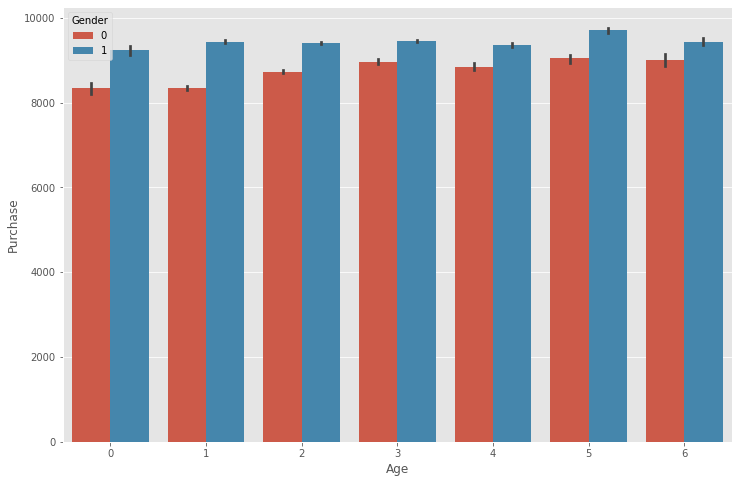

In [188]:
import seaborn as sns

sns.barplot(x="Age",y="Purchase",hue="Gender", data=df_train)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

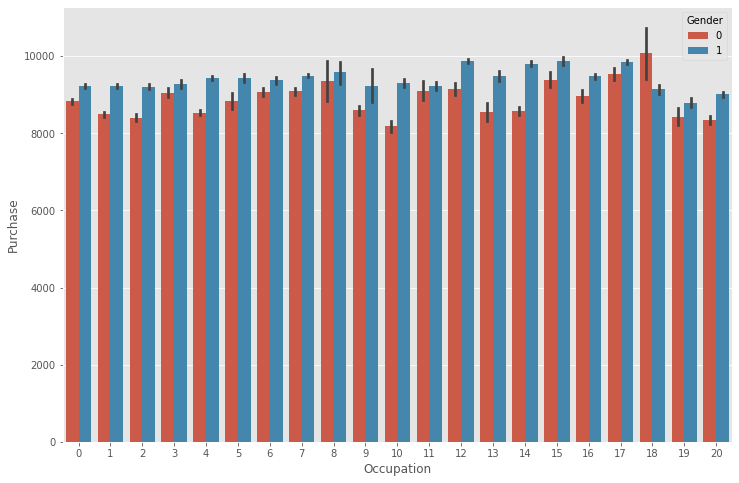

In [189]:
sns.barplot(x="Occupation",y="Purchase",hue="Gender", data=df_train)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

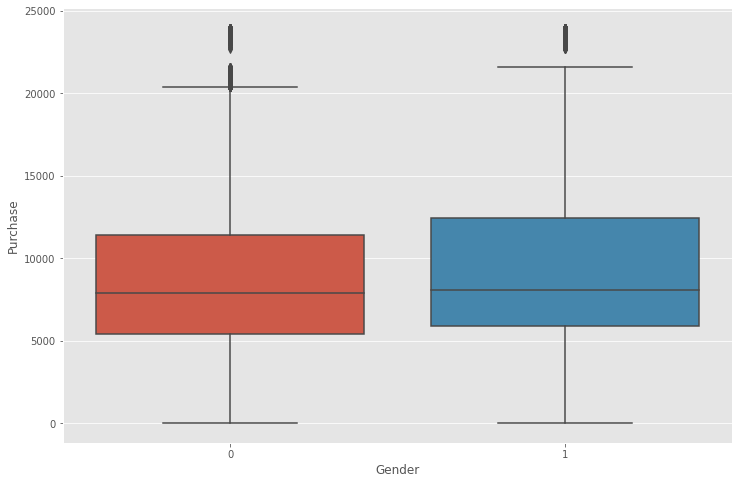

In [198]:
sns.boxplot(x="Gender",y="Purchase",data=df_train)

## Feature Scaling

In [256]:
data = df_train.copy()

y = data['Purchase']
x= data.drop(["Purchase","Product_ID","Product_Category_2","Product_Category_3"], axis =1)

In [257]:
# We do the split of our train data into test and train to understand the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [258]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((368545, 8), (181523, 8), (368545,), (181523,))

In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Now Train the Machine Learning Model

In [260]:
# Base Model- Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtr= DecisionTreeRegressor()

dtr.fit(X_train,y_train)

d_predict= dtr.predict(X_test)

In [261]:
print("RMSE score for Decision Tree : ", np.sqrt(mean_squared_error(y_test,d_predict)))


RMSE score for Decision Tree :  2998.240397364107


In [262]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


rfc=RandomForestRegressor(n_estimators=150)
gbr=GradientBoostingRegressor()


In [263]:
rfc.fit(X_train, y_train)
r_predict= rfc.predict(X_test)

In [264]:
gbr.fit(X_train,y_train)
g_predict= gbr.predict(X_test)

In [265]:
print("RMSE score for Random Forest= : ", np.sqrt(mean_squared_error(y_test,r_predict)))
print("RMSE score for Gradient Boosting : ", np.sqrt(mean_squared_error(y_test,g_predict)))


RMSE score for Random Forest= :  2961.279448913295
RMSE score for Gradient Boosting :  3021.995557945291


#### Gradient Boosting performing well compared to other

## Lets do the predictions for the Kaggle Test data

In [286]:
test = df_test.copy().drop(["Purchase","Product_ID","Product_Category_2","Product_Category_3"],axis=1)
test.shape

(233599, 8)

In [287]:
t_predict= dtr.predict(test)

C:\Users\Welcome\.conda\envs\py3.8\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [288]:
test['Purchase']=t_predict

C:\Users\Welcome\.conda\envs\py3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Purchase distribution for the test data AxesSubplot(0.125,0.125;0.775x0.755)


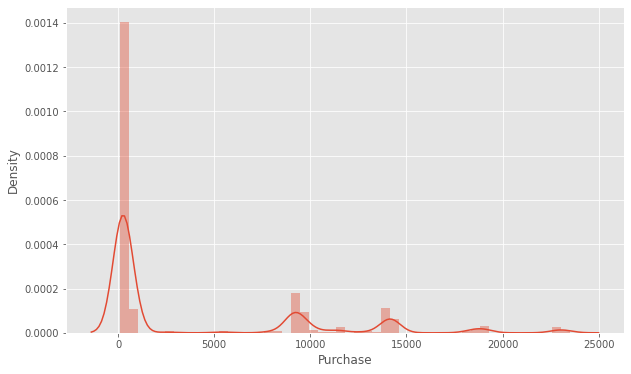

In [289]:
plt.rcParams['figure.figsize'] = (10,6)
print("Purchase distribution for the test data", sns.distplot(test['Purchase']))